In [93]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import sklearn as sk
from sklearn.mixture import GaussianMixture
from matplotlib.colors import ListedColormap

Dataset = sio.loadmat('Dataset.mat')
X1 = Dataset['X1']
X2 = Dataset['X2']

In [45]:
firstx=np.array([[2.01,2.99,3.98,5.02],[20.78,-15.26,19.38,-25.02],[3.08,3.88,4.15,6.02]])

In [3]:
sk.mixture.GaussianMixture()

GaussianMixture()

In [4]:
gm1 = GaussianMixture(n_components = 1,random_state=0).fit(X1)

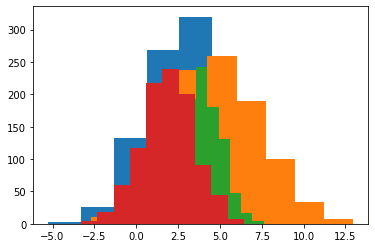

In [7]:
plt.hist(X1[:,1],bins=9)
plt.hist(X1[:,3],bins=9)
plt.hist(X1[:,2],bins=10)
plt.hist(X1[:,0],bins=10)
plt.show()

In [102]:
#Getting the mean for each column
columnmean=np.mean(X1,axis=0)
#Checking distance of data points from mean to check for any further indication for normality
MeasuredDistanceForNormality=np.linalg.norm(X1-columnmean,axis=1)

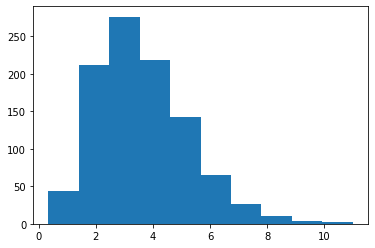

In [114]:
plt.hist(MeasuredDistanceForNormality)
plt.show()
#We see that the distance of the data points from the mean resembles a normal distribution so that is another indicator
#that the data points are generated from a normal distribution.

In [8]:
#We see that that if we split the 4 dimensional data points into data points of one dimension each of them resembles a normal
#distribution which indicate that the 4th dimensional data points MAY BE normally distributed.

In [9]:
#Measuring the pdf for the given data points with the following scipy function.(I've reshaped the inputs so 
#they are compatible with the function)

In [10]:
pdf1 =scipy.stats.multivariate_normal.pdf((firstx),gm1.means_.reshape(4,),gm1.covariances_.reshape(4,4))
pdf1

array([3.37903694e-003, 1.28655830e-206, 1.95207408e-003])

In [11]:
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
cmap = ListedColormap(colors[:len(np.unique(X1[:,0]))])

***X2 Dataset***

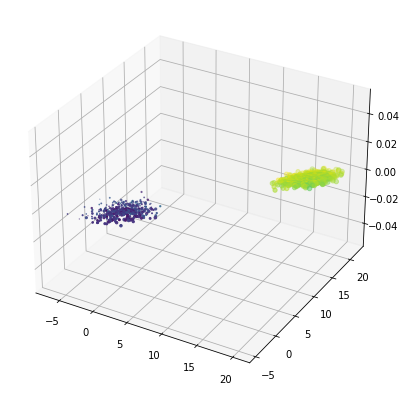

In [39]:
fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(projection='3d')
plt.scatter(X2[:,0],X2[:,1],X2[:,2],X2[:,3])
plt.show()

In [35]:
#We see that the data points are gathered near 2 points and with the following histogram we can say that the
#data points are generated from a bimodal normal distribution.(Each bar of the histogram represents one dimension of the data
#points)

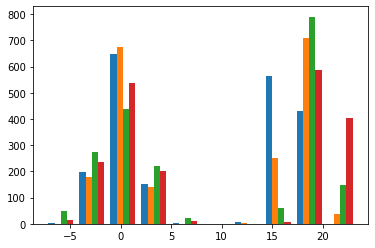

In [37]:
plt.hist(X2)
plt.show()

In [40]:
gm2 = GaussianMixture(n_components = 2).fit(X2)

In [41]:
gm2.means_

array([[ 1.69885937e+01,  1.79929660e+01,  1.89933557e+01,
         1.99915999e+01],
       [ 2.80527613e-03,  3.24565079e-02, -1.33126366e-01,
         8.13765609e-02]])

In [42]:
gm2.covariances_

array([[[ 1.29209515,  0.93452653,  0.38234925, -0.27677549],
        [ 0.93452653,  1.54785039,  0.44085604,  0.15801401],
        [ 0.38234925,  0.44085604,  1.42213399, -0.40128317],
        [-0.27677549,  0.15801401, -0.40128317,  1.32772529]],

       [[ 2.72213566,  0.64162882,  2.25857803, -0.69748579],
        [ 0.64162882,  2.42878413, -1.20733932,  0.95572237],
        [ 2.25857803, -1.20733932,  6.33695491, -2.49310398],
        [-0.69748579,  0.95572237, -2.49310398,  4.3452263 ]]])

In [43]:
secondx=np.array([[0.05,0.15,-0.12,-0.08],[7.18,7.98,9.12,9.94],[3.48,4.01,4.55,4.96],[20.78,-15.26,19.38,-25.02]])

In [44]:
pdf2forfirst =scipy.stats.multivariate_normal.pdf(secondx,gm2.means_[0].reshape(4,),gm2.covariances_[0].reshape(4,4))
pdf2forfirst

array([2.53428829e-226, 1.14317387e-063, 2.41185203e-132, 0.00000000e+000])

In [22]:
pdf2forsecond=scipy.stats.multivariate_normal.pdf(secondx,gm2.means_[1].reshape(4,),gm2.covariances_[1].reshape(4,4))
pdf2forsecond

array([2.53428829e-226, 1.14317387e-063, 2.41185203e-132, 0.00000000e+000])

In [23]:
gm2.predict_proba(secondx)

array([[1.00000000e+000, 8.02848225e-224],
       [1.00000000e+000, 3.16688083e-040],
       [1.00000000e+000, 1.38729898e-124],
       [1.00000000e+000, 0.00000000e+000]])

In [24]:
#The true pdfs value are
pdf2forfirst*gm2.predict_proba(secondx)[:,0]+pdf2forsecond*gm2.predict_proba(secondx)[:,1]

array([3.15662190e-003, 3.60977861e-024, 1.73852361e-008, 4.12068372e-102])

***Non-parametric;We are going to use the KNN Density Algorithm***

In [46]:
distances1 = np.linalg.norm(X1 - firstx[0], axis=1)
distances1.sort()

In [47]:
distances2=np.linalg.norm(X1 - firstx[1], axis=1)
distances2.sort()

In [48]:
distances3=np.linalg.norm(X1 - firstx[2], axis=1)
distances3.sort()

For K=10 we will get the 10th closes data points

In [49]:
K=10

In [52]:
N1=len(X1)
N2=len(X2)

In [120]:
# A 4 dimensional sphere has two 'volumes'. An interior volume, which is 4 dimensional, 
# and a surface volume which is 3 dimensional. The formula for its interior volume is V = (1/2)(pi^2)(r^4).
# We need the interior volume for this exercise.

#Now that we've measured the distances between the given Xs and the data points of the dataset we need to calculate the volume of the 4d sphere given K-st nearest neighbor distance.

#After computing that we are going to get the PDF values by dividing K(Nearest Neighbor Input) with the number of data points multiplied with the volume

In [61]:
volume1=1/2*np.pi**2*distances1[9]**4
print("PDF Value for the first x data point given is ",K/(N1*volume1))

PDF Value for the first x data point given is  0.0055969768205767255


In [63]:
volume2=1/2*np.pi**2*distances2[9]**4
print("PDF Value for the second x data point given is ",K/(N1*volume2))

PDF Value for the second x data point given is  8.41708852537257e-10


In [64]:
volume3=1/2*np.pi**2*distances3[9]**4
print("PDF Value for the third x data point given is ",K/(N1*volume3))

PDF Value for the third x data point given is  0.002163258721799876


***For the second Dataset;Non-parametric***

In [65]:
seconddistances1 = np.linalg.norm(X2 - secondx[0], axis=1)
seconddistances1.sort()
seconddistances1

array([ 0.35468488,  0.60582548,  0.75762647, ..., 41.04882324,
       41.49824736, 41.87306909])

In [66]:
seconddistances2 = np.linalg.norm(X2 - secondx[1], axis=1)
seconddistances2.sort()
seconddistances2

array([11.25812354, 12.07126893, 12.27049151, ..., 24.02065264,
       24.46539497, 24.87702113])

In [67]:
seconddistances3 = np.linalg.norm(X2 - secondx[2], axis=1)
seconddistances3.sort()
seconddistances3

array([ 3.27124355,  3.59561124,  3.62840126, ..., 32.56249743,
       33.00892543, 33.39370939])

In [68]:
seconddistances4 = np.linalg.norm(X2 - secondx[3], axis=1)
seconddistances4.sort()
seconddistances4

array([33.9162834 , 34.18352363, 34.43192503, ..., 59.54435434,
       59.65706645, 60.23414926])

#Now that we've measured the distances between the given Xs and the data points of the dataset we need to calculate the volume of the 4d sphere given K-st nearest neighbor distance.

#After computing that we are going to get the PDF values by dividing K(Nearest Neighbor Input) with the number of data points multiplied with the volume


In [73]:
secondvolume1=1/2*np.pi**2*seconddistances1[9]**4
print("PDF value for the first x point given/Second Dataset is",K/(N2*secondvolume1))

PDF value for the first x point given/Second Dataset is 0.001426411897188061


In [76]:
secondvolume2=1/2*np.pi**2*seconddistances2[9]**4
print("PDF value for the second x point given/Second Dataset is",K/(N2*secondvolume2))

PDF value for the second x point given/Second Dataset is 3.4201542093158395e-08


In [77]:
secondvolume3=1/2*np.pi**2*seconddistances3[9]**4
print("PDF value for the third x point given/Second Dataset is",K/(N2*secondvolume3))

PDF value for the third x point given/Second Dataset is 1.5379681165765267e-06


In [78]:
secondvolume4=1/2*np.pi**2*seconddistances4[9]**4
print("PDF value for the fourth x point given/Second Dataset is",K/(N2*secondvolume4))

PDF value for the fourth x point given/Second Dataset is 6.806633364542489e-10
